<a href="https://colab.research.google.com/github/meghnalaha/Mini-Project/blob/main/Mini_Project_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install ipython-autotime
%load_ext autotime

time: 2.96 ms (started: 2021-06-17 14:16:29 +00:00)


In [ ]:
!pip install bing-image-downloader

time: 3.34 s (started: 2021-06-17 14:16:29 +00:00)


In [ ]:
!mkdir Pictures

time: 118 ms (started: 2021-06-17 14:16:33 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("Birthday Cakes", limit = 25, output_dir ='images', adult_filter_off = True)

[%] Downloading Images to /content/images/Birthday Cakes


[!!]Indexing page: 1

[%] Indexed 25 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/4e/19/a7/4e19a75b8936180c735ec02de514d22a.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/c6/15/1a/c6151aed8c7b6c3816b37bb370d92ffc.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/63/b3/e9/63b3e9e8c0cc3b14277a6e0abc842afa.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://live.staticflickr.com/4138/4805875494_de16f21169_b.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.dirtylaundrykitchen.com/wp-content/uploads/2013/04/true-birthday-cake-marble-with-chocolate-buttercream.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/5f/4a/fd/5f4afd2c6c607476984738207fef79e4.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://pbs.twimg.com/media/DTWxKKVU0AA44gY.jp

In [ ]:
downloader.download("Beautiful Houses", limit = 25, output_dir ='images', adult_filter_off = True)

[%] Downloading Images to /content/images/Beautiful Houses


[!!]Indexing page: 1

[%] Indexed 25 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/37/65/de/3765debd6f194d05d9cd401d64256ba2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/d9/45/5a/d9455a0cf29c8ee742d4bd1310630035.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/61/85/5d/61855db77365acacdb178126d03aa816.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/74/42/90/74429079d8b6a0fa432e04e947976209.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/ba/08/ad/ba08ada36edeb3d10dc36963c062f2e8.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/15/7c/ef/157cefd2b803aff7538a0d127b67be82.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/originals/ce/fd/b6/cefdb64fce1dfe263ae202886d137265

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DataDir = '/content/images'
CATEGORIES = ['Beautiful Houses', 'Birthday Cakes']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DataDir, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 41.6 s (started: 2021-06-17 14:16:41 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 109)

time: 249 ms (started: 2021-06-17 14:17:22 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid =[
             {'C':[1,10,100,1000], 'kernel': ['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel': ['rbf']},
             ]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 31.1 s (started: 2021-06-17 14:17:23 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

time: 77.7 ms (started: 2021-06-17 14:17:54 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

time: 1.8 ms (started: 2021-06-17 14:17:54 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.8666666666666667

time: 6.91 ms (started: 2021-06-17 14:17:54 +00:00)


In [ ]:
confusion_matrix(y_pred, y_test)

array([[6, 2],
       [0, 7]])

time: 12.4 ms (started: 2021-06-17 14:17:54 +00:00)


In [ ]:
import pickle
pickle.dump(clf, open('img_model.p','wb'))

time: 48.5 ms (started: 2021-06-17 14:17:54 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 16 ms (started: 2021-06-17 14:17:54 +00:00)


Enter any URLhttps://i2.wp.com/bakewithshivesh.com/wp-content/uploads/2019/04/Birthday-Cake.jpg?resize=980%2C1470&ssl=1.jpg
(1470, 980, 3)
Predicted output:Birthday Cakes


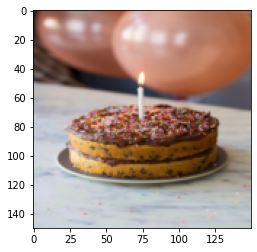

time: 6.66 s (started: 2021-06-17 14:19:18 +00:00)


In [ ]:
flat_data =[]
url = input('Enter any URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted output:{y_out}')

